In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData


In [2]:
#Measuring Beam Diameter of HeNe Laser

#Measured data
xblock = [-0.349, -0.146, 0, 0.137, 0.346]       #distance from center of power dector blocked [mm]
xerr = [0.0009, 0.0007, 0.0012, 0.0009, 0.0016]  #standard error of measurments [mm]

power = [7.88, 6.13, 4.38, 2.63, 0.88]  #power of beam [mW]
perr = [0.01, 0.01, 0.01, 0.01, 0.01]   #power detector uncertainty [mW]


#Model function for total power of beam
def power_curvefit(params, x):
    P0 = 8.70  #total power of beam [mW]
    z = -(np.sqrt(2)*x)/params[0]
    return (P0/2)*(1+erf(z))


#Compute Nonlinear ODR curvefit
data = RealData(xblock, power, xerr, perr)
model = Model(power_curvefit)
pguess = [0.5]
odr = ODR(data, model, pguess)
output = odr.run()
print('The best fit beam width is', str(round(output.beta[0],3)),'+-',str(round(output.sd_beta[0],3))+'mm.')
    

The best fit beam width is 0.536 +- 0.004mm.


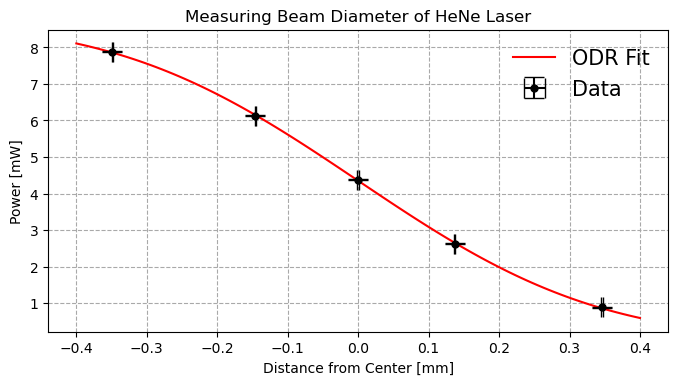

In [3]:
#Plotting the non-linear odr fit

#Creating range of distances for odr fit
xrange = np.linspace(-0.4, 0.4, 100)


plt.figure(figsize=(8,4), dpi=100)
plt.plot(xrange, power_curvefit(output.beta, xrange), color='red', label='ODR Fit')
plt.errorbar(xblock, power, perr, xerr, linestyle='None', markersize=10, capsize=7, fmt='k.', label='Data')
plt.grid(True, linestyle='dashed', color='darkgray')
plt.xlabel('Distance from Center [mm]')
plt.ylabel('Power [mW]')
plt.title('Measuring Beam Diameter of HeNe Laser')
plt.legend(prop={'size':15}, frameon=False)
plt.rcParams['legend.loc'] = 'upper right'
plt.show()
